In [1]:
import numpy as np
import networkx as nx
from networkx.algorithms.moral import moral_graph
from timeit import timeit

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(''), '..')))
import weighted_imputation as wi

In [3]:
def build_graph(N, p=0.3):
    nodes = [str(n) for n in range(N)]
    matrix = np.random.choice(a=[False, True], size=(N, N), p=[p, 1-p])
    return wi.DirectedGraph(nodes, matrix)

In [4]:
params = [10, 25, 50, 100]
graphs = [build_graph(N) for N in params]
Gs = [graph.to_networkx() for graph in graphs]

In [5]:
# Invoke JIT for the first time
nop = wi.moralize(graphs[0])
nop = wi.moralize(graphs[0], force_parallel=True)

In [6]:
time0 = [timeit(lambda: wi.moralize(graph), number=1000) for graph in graphs]
time0

[0.4547340770000119,
 0.44769491499982905,
 0.5700705180001933,
 0.7608874960001231]

In [7]:
time1 = [timeit(lambda: wi.moralize(graph, force_parallel=True), number=1000) for graph in graphs]
time1

[0.4896740409999438,
 0.5011194639996575,
 0.5626004420000754,
 0.7530187810002644]

In [8]:
time2 = [timeit(lambda: moral_graph(G), number=1000) for G in Gs]
time2

[0.4142916770001648, 3.986146032999841, 25.7391686320002, 191.356765387]

In [9]:
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [10]:
x = np.arange(len(params))
width = 0.20

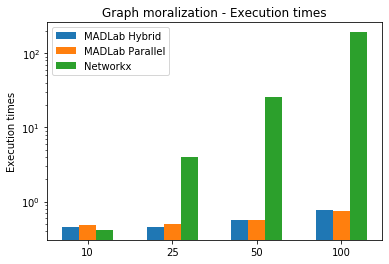

In [11]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, time0, width, label='MADLab Hybrid')
rects2 = ax.bar(x, time1, width, label='MADLab Parallel')
rects3 = ax.bar(x + width, time2, width, label='Networkx')

plt.yscale('log')
ax.set_ylabel('Execution times')
ax.set_title('Graph moralization - Execution times')
ax.set_xticks(x)
ax.set_xticklabels(params)
ax.legend()

In [12]:
fig.tight_layout()
plt.show()